# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Ghazi Taqiyya Al Anshari
- Email: taqiyyaghazi@gmail.com
- Id Dicoding: zitaqiy

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample, shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

### Menyiapkan data yang akan digunakan

In [2]:
df = pd.read_csv('/content/data.csv', sep=";")

## Data Understanding

In [3]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [6]:
df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [7]:
categorical_columns = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'International',
    'Status'
]

numerical_columns = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]


In [8]:
df[categorical_columns].astype(object).describe()

,Marital_status,Application_mode,Course,Daytime_evening_attendance,Previous_qualification,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,Status
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,18,17,2,17,21,29,34,32,46,2,2,2,2,2,2,2,3
top,1,1,9500,1,1,1,1,37,9,9,1,0,0,1,0,0,0,Graduate
freq,3919,1708,766,3941,3717,4314,1069,1209,1577,1010,2426,4373,3921,3896,2868,3325,4314,2209


In [9]:
df[numerical_columns].describe()

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [10]:
for col in categorical_columns:
    print(df[col].value_counts())

Marital_status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64
Application_mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64
Daytime_evening_attendance
1    3941
0     483
Name: count, dtype: int64
Previous_qualification
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: count, dtype: int64
Nacionality
1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103 

In [11]:
df.duplicated().sum()

0

### Exploratory Data Analysis

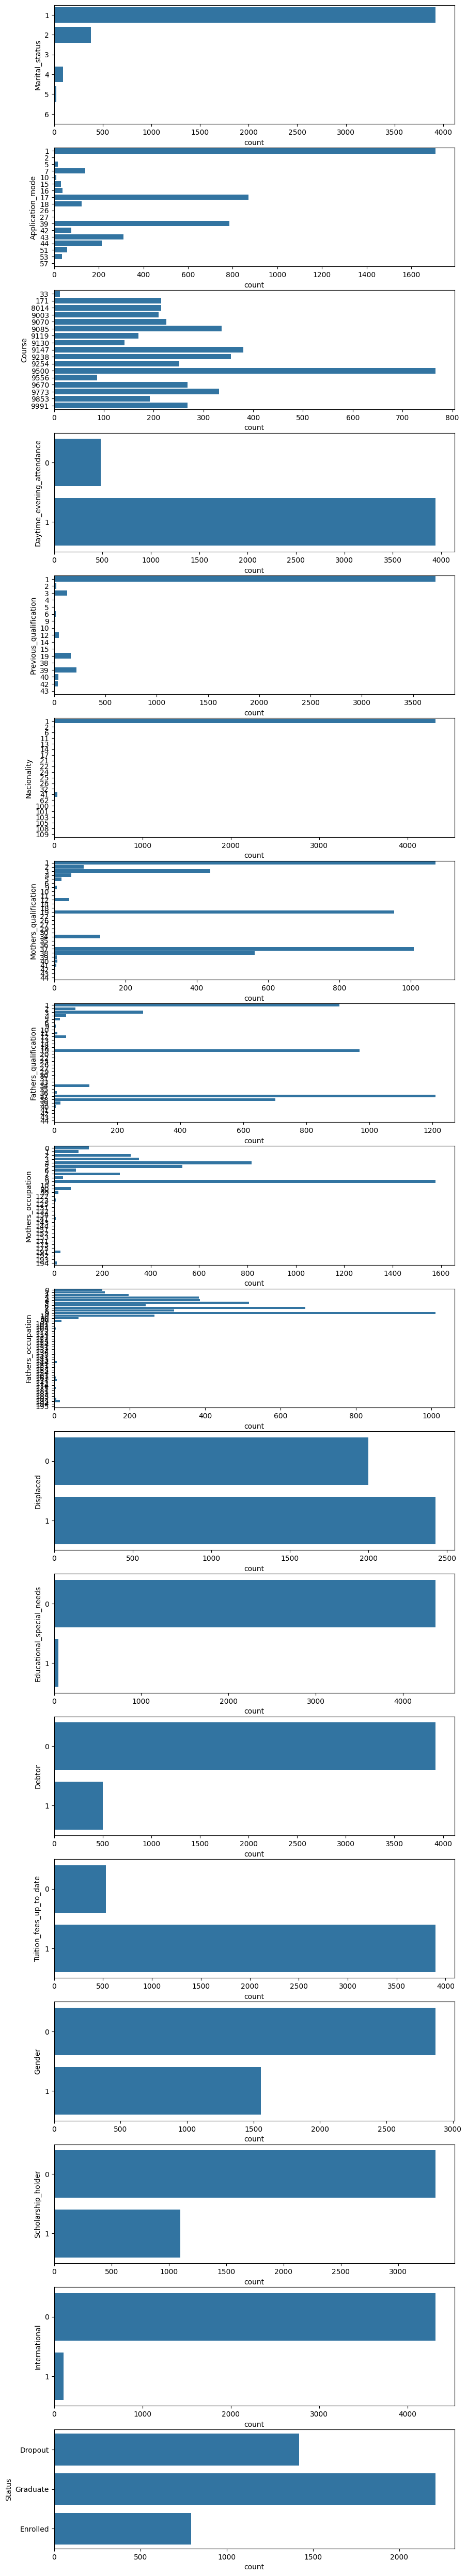

In [12]:
fig, ax = plt.subplots(len(categorical_columns), 1,figsize=(10,64))
for i, feature in enumerate(categorical_columns):
    sns.countplot(data=df, y=feature, ax=ax[i])
plt.show()

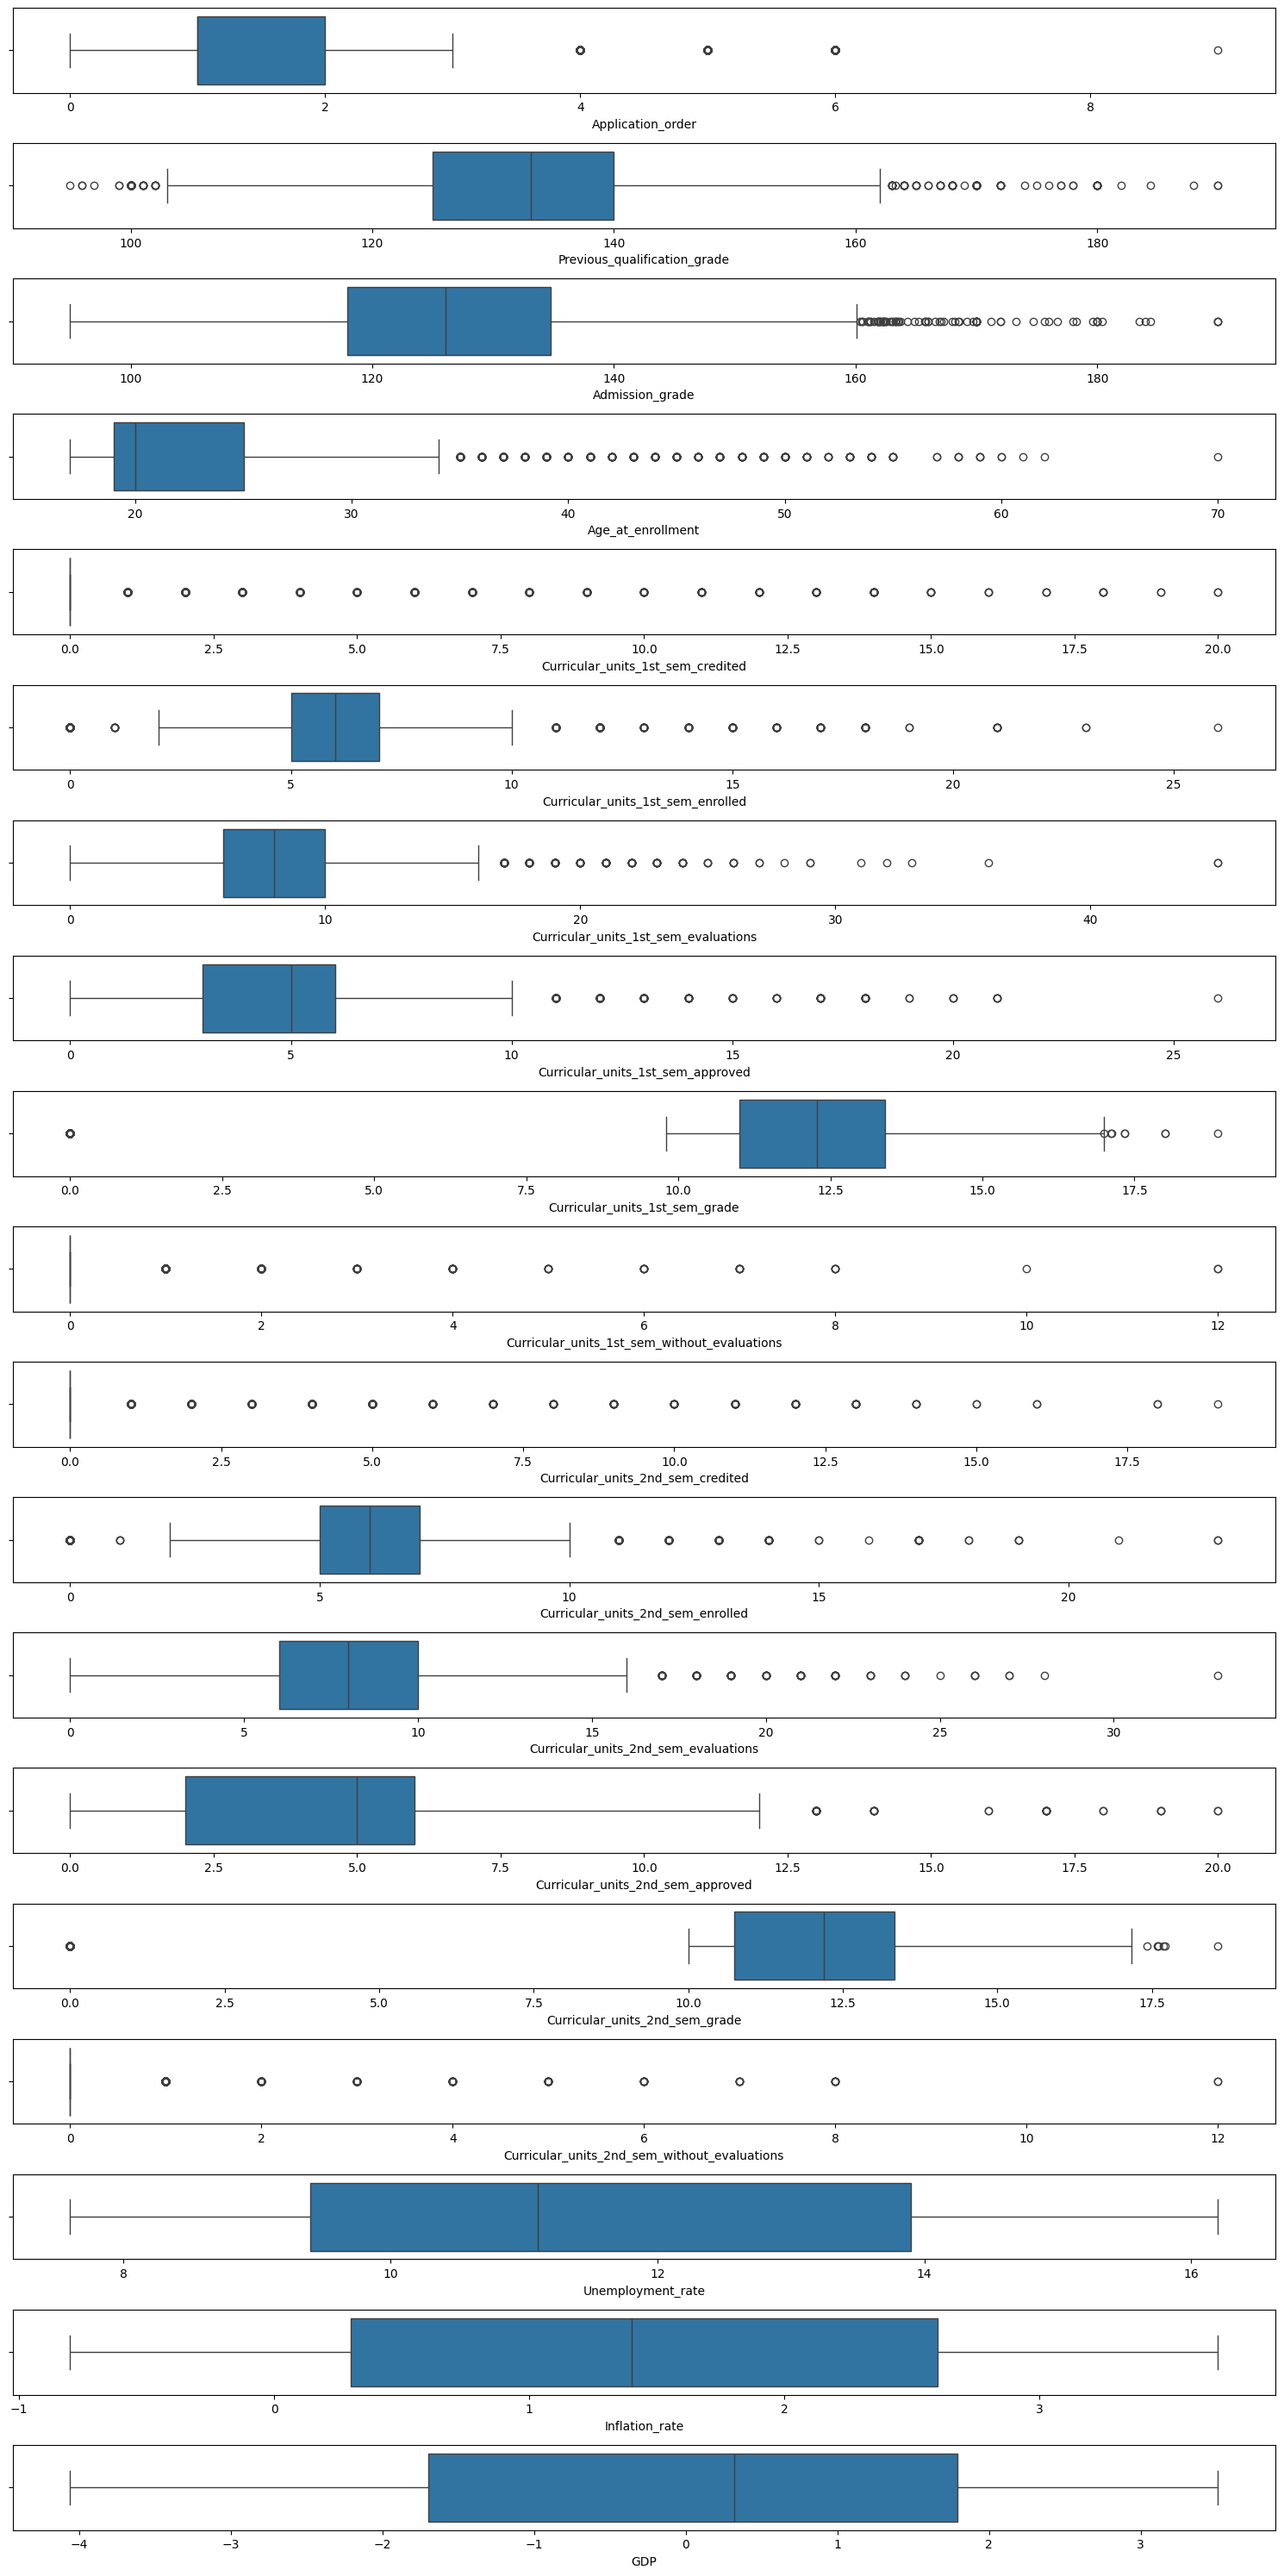

In [13]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,30))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=numerical_columns,
    df=df
)

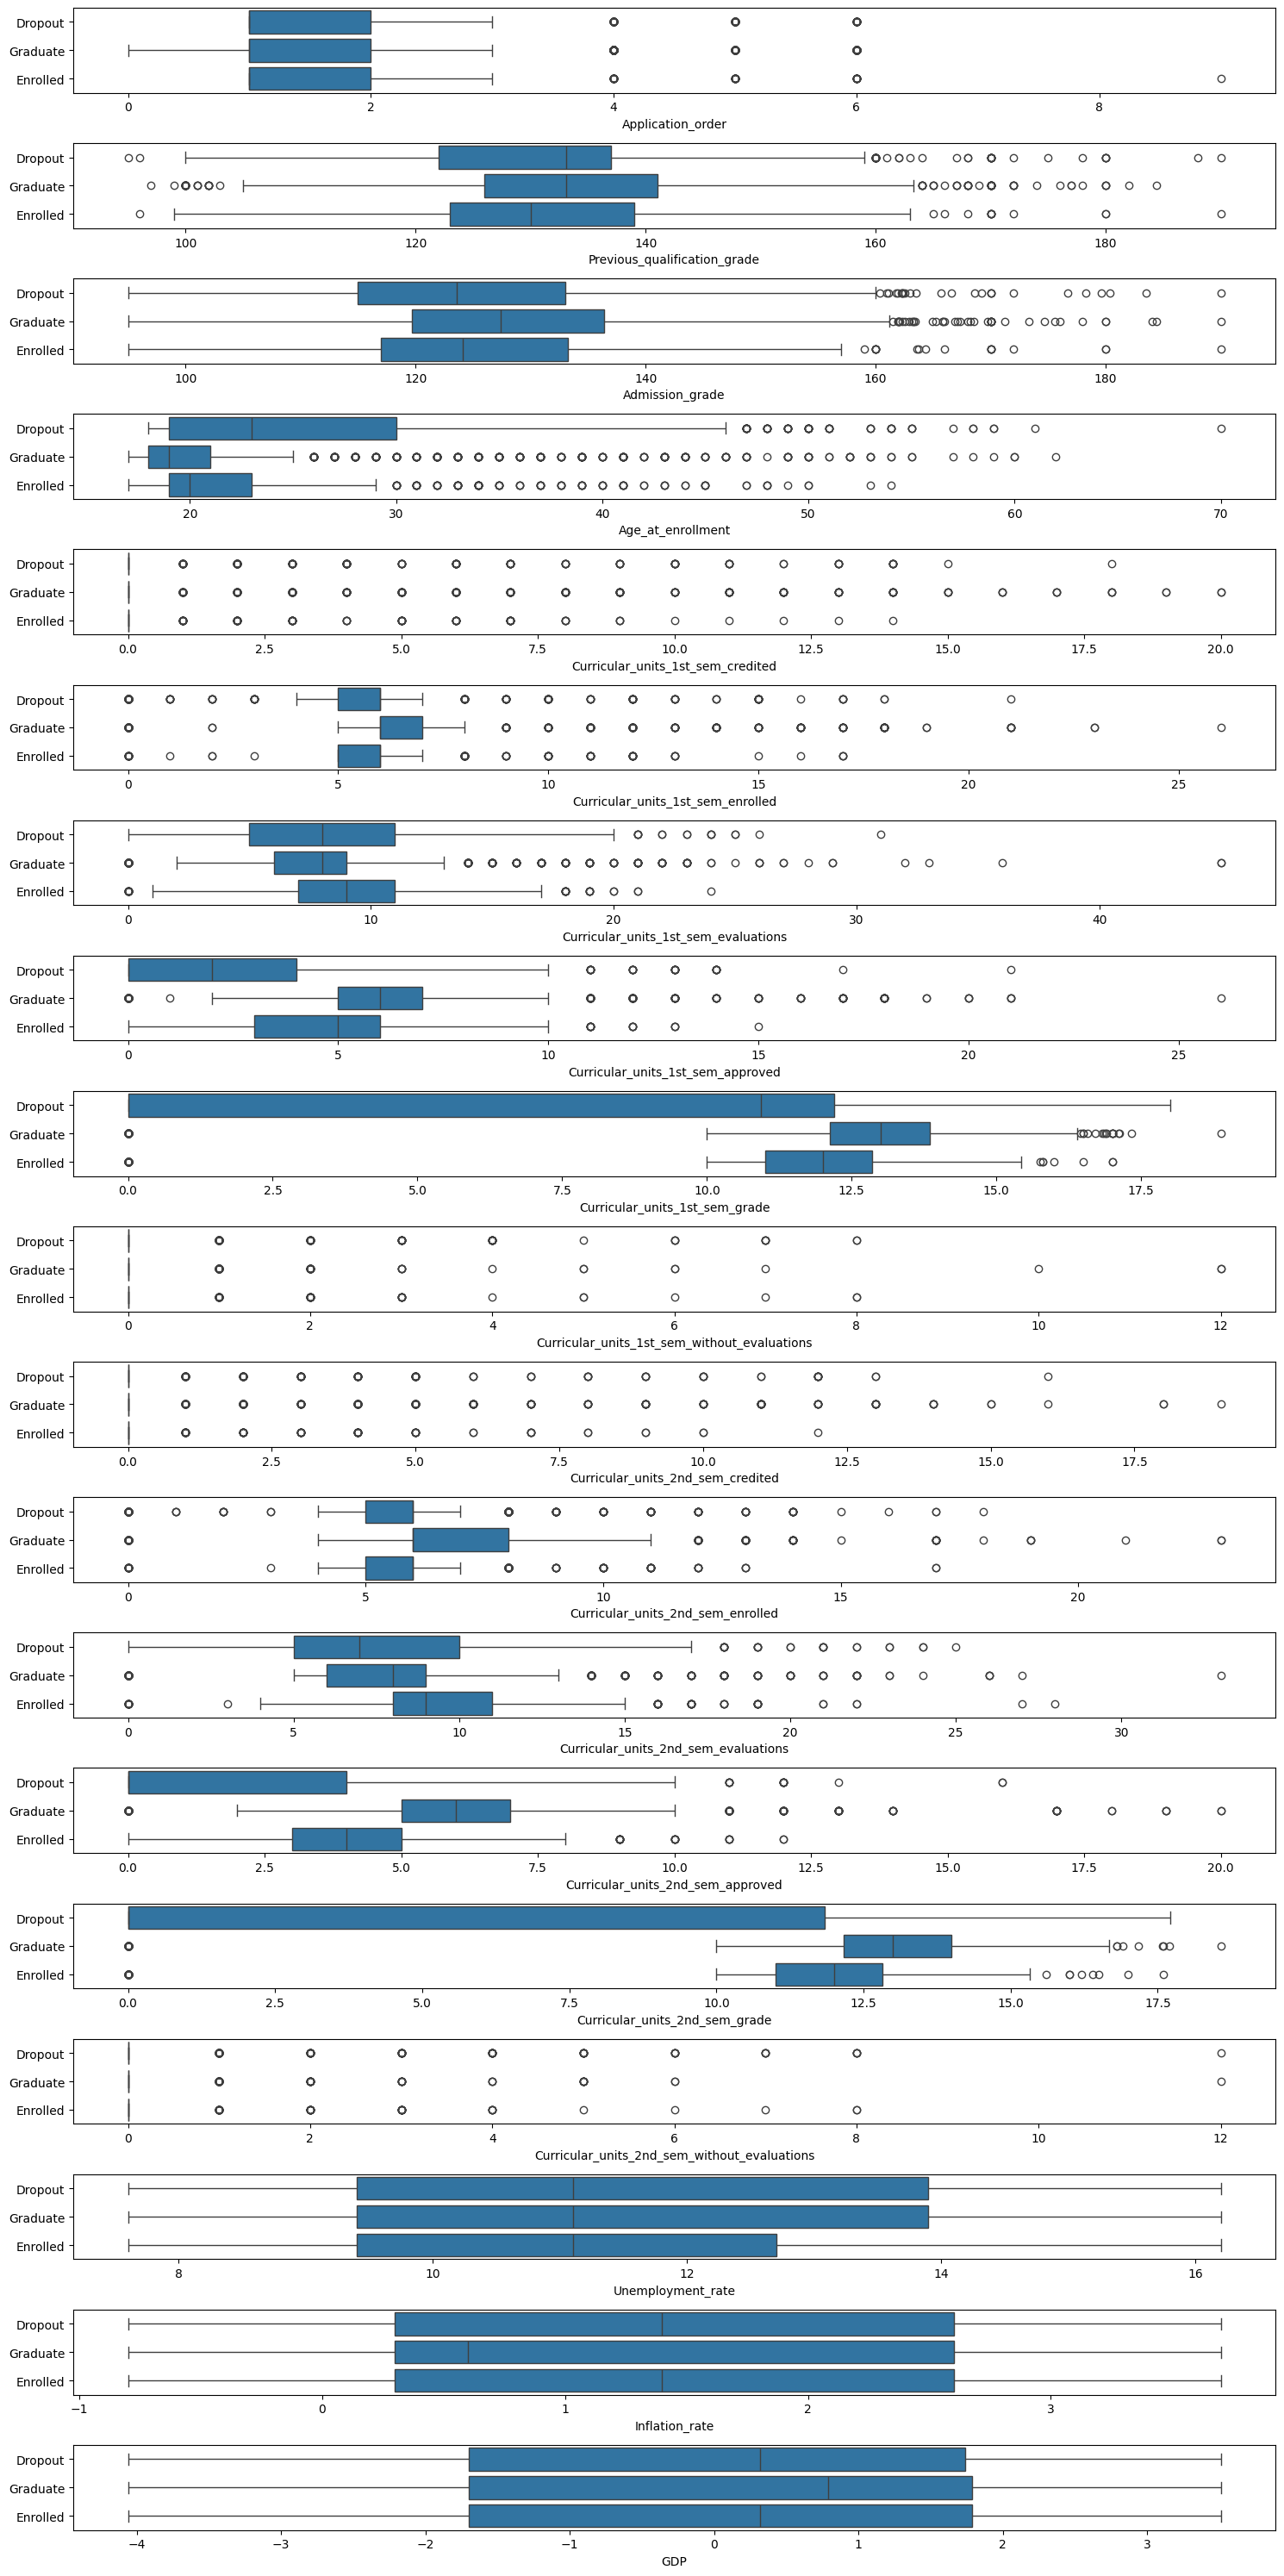

In [14]:
numerical_dis_plot(
    features=numerical_columns,
    df=df,
    segment_feature="Status"
)


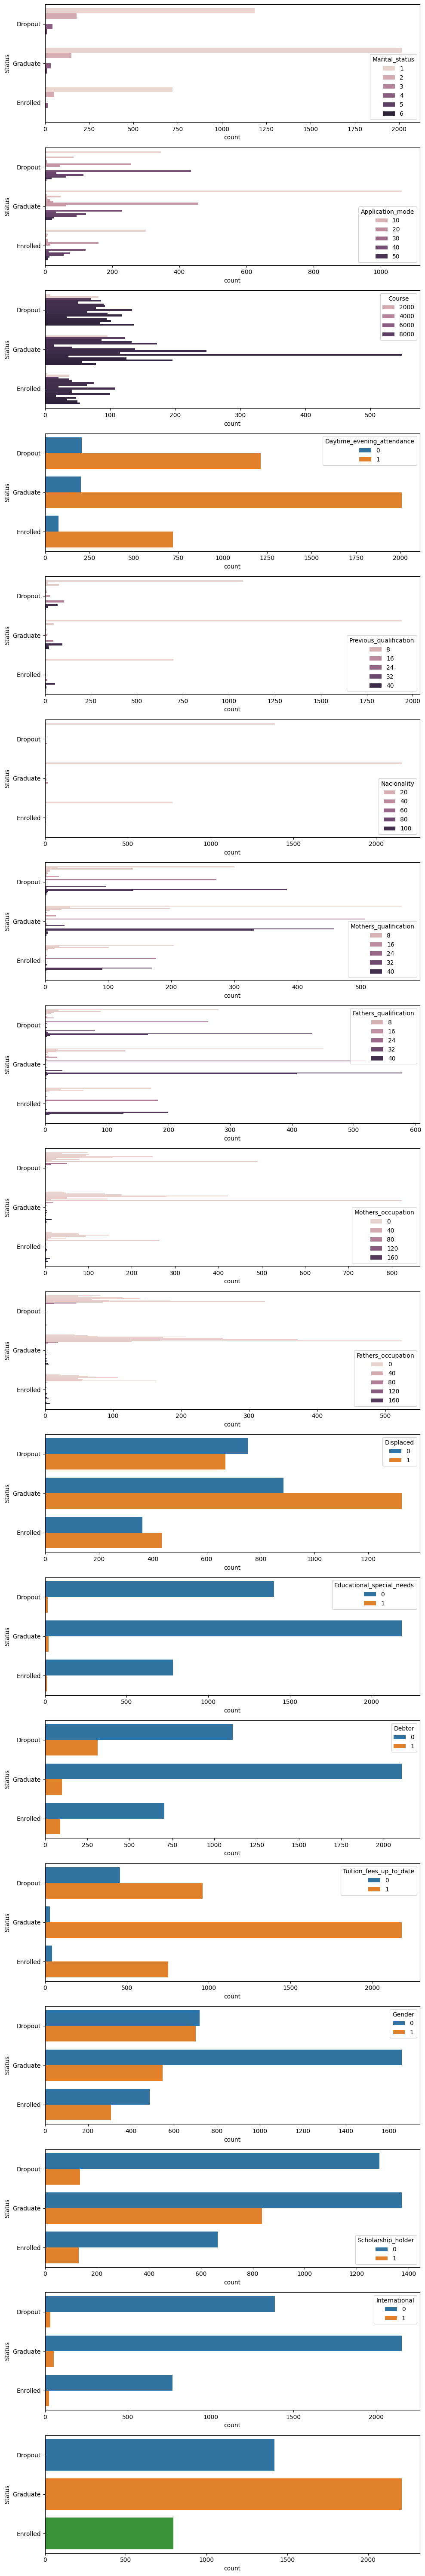

In [15]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,60))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, y=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

categorical_plot(
    features=categorical_columns,
    df=df,
    segment_feature="Status"
)

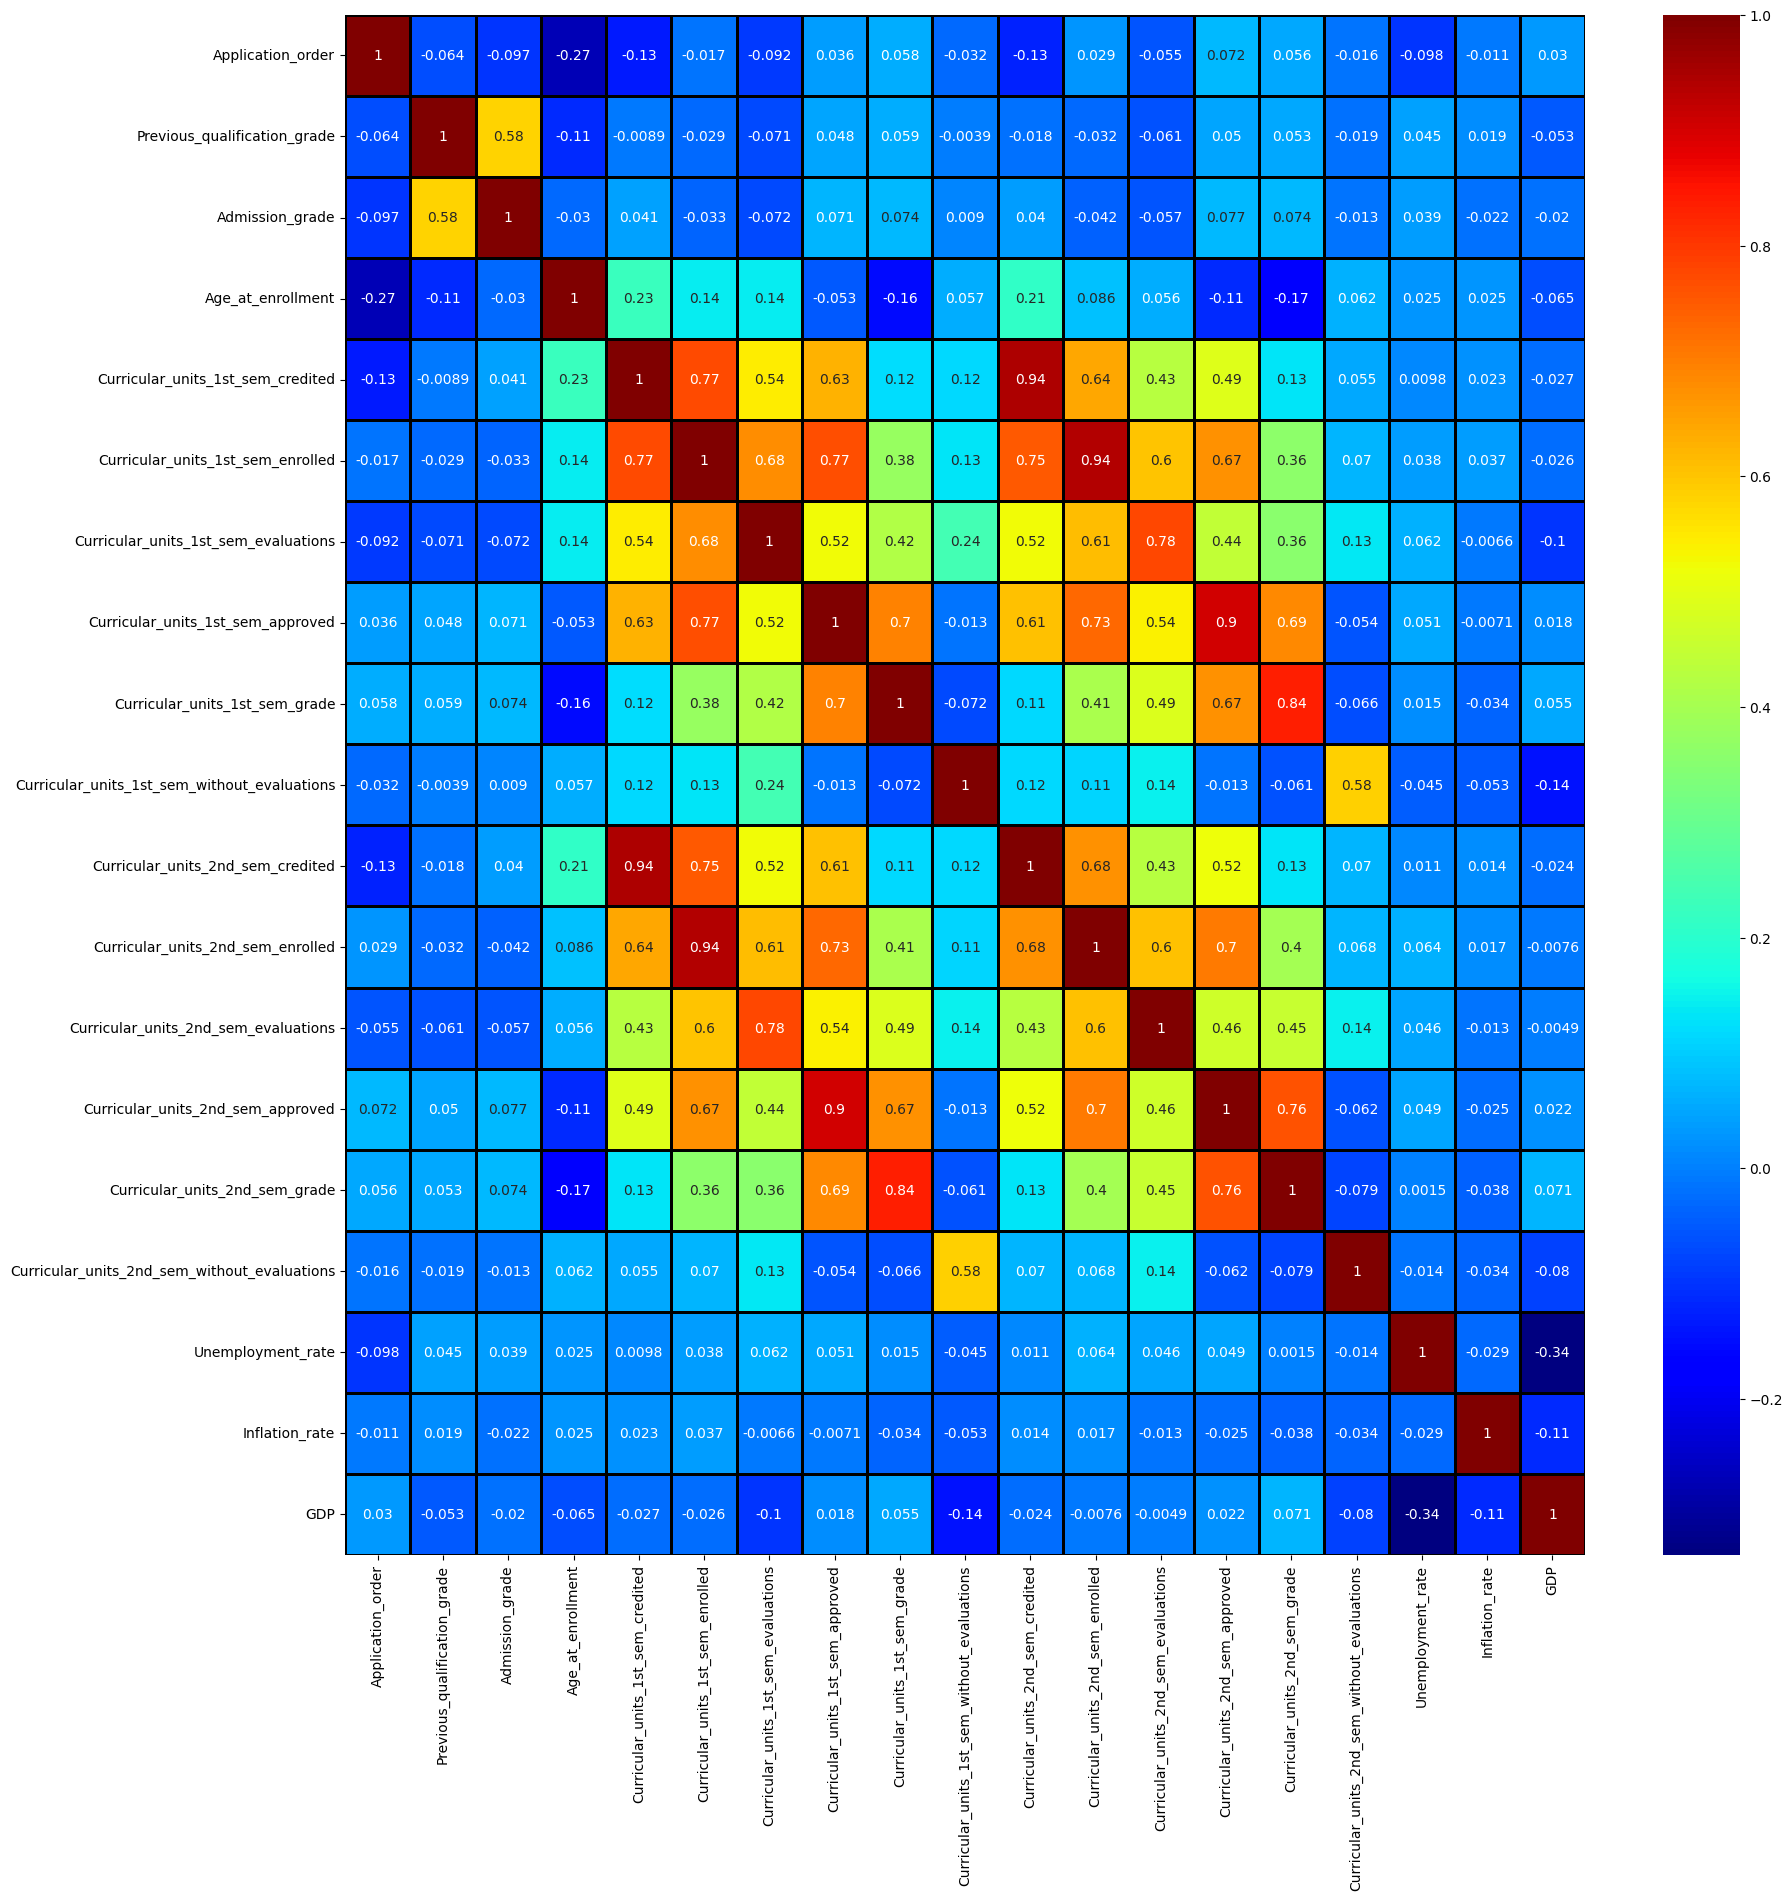

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

## Data Preparation / Preprocessing

### Train-test split

In [17]:
train_df, test_df = train_test_split(df, test_size=0.05, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

### Undersampling

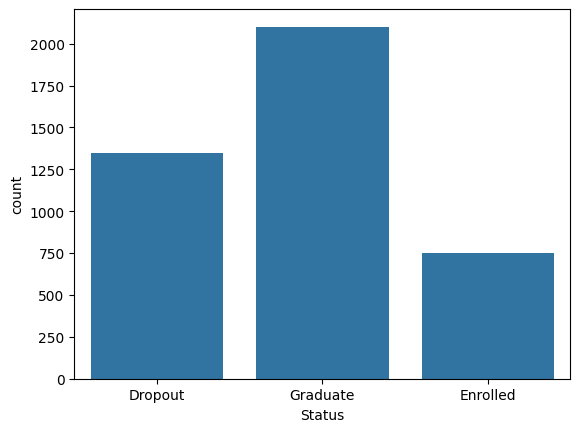

In [18]:
sns.countplot(data=train_df, x="Status")
plt.show()

In [19]:
train_df.Status.value_counts()

,count
Status,
Graduate,2101
Dropout,1349
Enrolled,752


In [20]:
df_majority_1 = train_df[(train_df.Status == "Graduate")]
df_majority_2 = train_df[(train_df.Status == "Dropout")]
df_minority = train_df[(train_df.Status == "Enrolled")]

In [21]:
df_majority_1_undersampled = resample(df_majority_1, n_samples=752, random_state=42)
df_majority_2_undersampled = resample(df_majority_2, n_samples=752, random_state=42)
print(df_majority_1_undersampled.shape)
print(df_majority_2_undersampled.shape)

(752, 37)
(752, 37)


In [22]:
undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_majority_2_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
134,1,1,2,171,1,1,117.0,1,1,19,...,4,11,16,11,14.500000,0,8.9,1.4,3.51,Graduate
182,6,39,1,9991,0,12,130.0,1,37,37,...,0,5,5,0,0.000000,0,7.6,2.6,0.32,Dropout
1813,1,1,1,9853,1,1,148.0,1,19,19,...,0,6,7,6,13.166667,0,9.4,-0.8,-3.12,Graduate
1154,1,1,1,9130,1,1,117.0,1,1,1,...,0,5,12,2,13.000000,0,12.7,3.7,-1.70,Enrolled
903,1,53,1,9085,1,42,140.0,1,1,1,...,4,9,15,6,13.500000,0,8.9,1.4,3.51,Enrolled


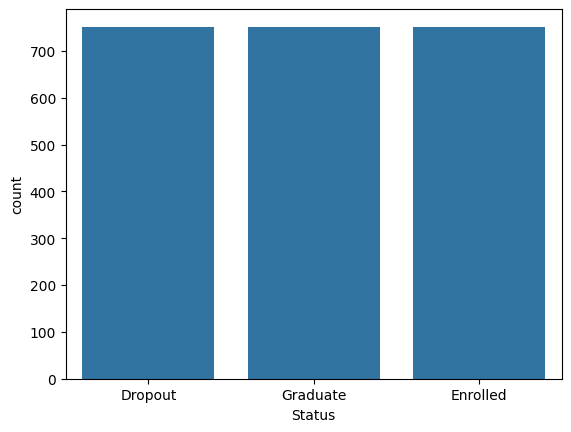

In [23]:
sns.countplot(data=undersampled_train_df, x="Status")
plt.show()

### Scaling & Encoding

In [24]:
X_train = undersampled_train_df.drop(columns="Status", axis=1)
y_train = undersampled_train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

In [25]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

In [26]:
new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)

In [27]:
new_train_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
0,1,7,0.0,9119,1,3,0.574468,1,3,2,...,0.0,0.000000,0.217391,0.000000,0.00,0.000000,0.0,0.732558,0.111111,0.640687
1,1,17,0.0,9070,1,1,0.244681,1,38,19,...,0.0,0.000000,0.260870,0.212121,0.25,0.621739,0.0,0.918605,0.800000,0.000000
2,1,1,0.0,9238,1,1,0.393617,1,1,19,...,0.0,0.000000,0.260870,0.272727,0.30,0.654037,0.0,1.000000,0.244444,0.414795
3,1,44,0.0,9085,1,39,0.574468,1,3,19,...,0.0,0.055556,0.260870,0.545455,0.15,0.715942,0.0,0.558140,0.288889,0.772787
4,2,39,0.0,9991,0,1,0.361702,1,38,38,...,0.0,0.000000,0.217391,0.303030,0.20,0.612319,0.0,0.732558,0.111111,0.640687


In [28]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

new_y_test = encoder.transform(y_test)

### Principal Component Analysis

In [29]:
pca_numerical_columns = [
      'Curricular_units_1st_sem_credited',
      'Curricular_units_1st_sem_enrolled',
      'Curricular_units_1st_sem_evaluations',
      'Curricular_units_1st_sem_approved',
      'Curricular_units_1st_sem_grade',
      'Curricular_units_1st_sem_without_evaluations',
      'Curricular_units_2nd_sem_credited',
      'Curricular_units_2nd_sem_enrolled',
      'Curricular_units_2nd_sem_evaluations',
      'Curricular_units_2nd_sem_approved',
      'Curricular_units_2nd_sem_grade',
      'Curricular_units_2nd_sem_without_evaluations',
      ]

In [30]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

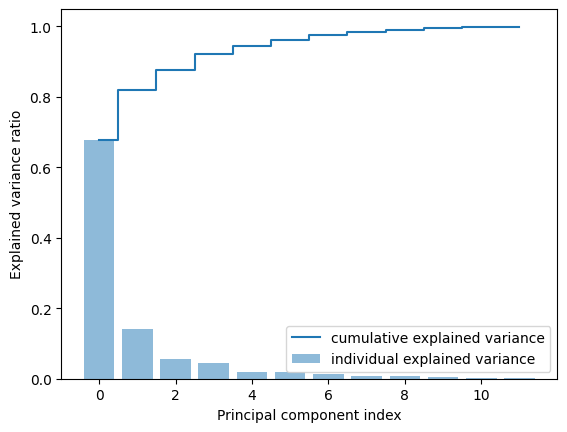

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(pca_numerical_columns), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [32]:
pca_1 = PCA(n_components=4, random_state=123)
pca_1.fit(train_pca_df[pca_numerical_columns])
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns])
train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4"])
train_pca_df.drop(columns=pca_numerical_columns, axis=1, inplace=True)
train_pca_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Scholarship_holder,Age_at_enrollment,International,Unemployment_rate,Inflation_rate,GDP,pc1_1,pc1_2,pc1_3,pc1_4
0,1,7,0.0,9119,1,3,0.574468,1,3,2,...,0,0.418605,0,0.732558,0.111111,0.640687,-0.871058,0.068613,-0.102396,-0.103539
1,1,17,0.0,9070,1,1,0.244681,1,38,19,...,1,0.093023,0,0.918605,0.800000,0.000000,0.078029,-0.072068,-0.011678,-0.033033
2,1,1,0.0,9238,1,1,0.393617,1,1,19,...,1,0.069767,0,1.000000,0.244444,0.414795,0.136403,-0.028585,-0.027274,0.015735
3,1,44,0.0,9085,1,39,0.574468,1,3,19,...,0,0.116279,0,0.558140,0.288889,0.772787,0.257076,0.012348,0.100485,0.181978
4,2,39,0.0,9991,0,1,0.361702,1,38,38,...,0,0.395349,0,0.732558,0.111111,0.640687,0.076150,-0.081886,0.049345,0.049579


In [33]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_numerical_columns])
test_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4"])
test_pca_df.drop(columns=pca_numerical_columns, axis=1, inplace=True)
test_pca_df.head()


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Scholarship_holder,Age_at_enrollment,International,Unemployment_rate,Inflation_rate,GDP,pc1_1,pc1_2,pc1_3,pc1_4
0,4,39,0.000,9130,1,1,0.394681,1,3,1,...,1,0.302326,0,0.406977,0.311111,0.803170,-0.369813,0.060535,-0.265382,0.425280
1,1,17,0.000,9238,1,1,0.308511,1,4,3,...,0,0.023256,0,1.000000,0.244444,0.414795,0.159274,-0.060191,-0.047850,-0.017422
2,1,17,0.000,9853,1,1,0.393617,1,38,38,...,1,0.023256,0,1.000000,0.244444,0.414795,0.241944,-0.028516,-0.044675,-0.116580
3,1,17,0.125,9670,1,1,0.148936,1,1,1,...,0,0.046512,0,0.918605,0.800000,0.000000,0.256534,-0.106524,0.015604,-0.050288
4,1,39,0.000,9500,1,1,0.361702,1,37,19,...,0,0.232558,0,0.406977,0.311111,0.803170,-0.733476,0.281315,0.084534,0.286643


## Modelling

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    "penalty": ["l2", None],
    "C": [0.01, 0.1, 1]
}

log_model = LogisticRegression(random_state=123)

CV_lr = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_lr.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2', None]})

In [35]:
print("best parameters: ", CV_lr.best_params_)

best parameters:  {'C': 0.1, 'penalty': 'l2'}


In [36]:
logreg_model = LogisticRegression(
    random_state=123,
    C=CV_lr.best_params_['C'],
    penalty=CV_lr.best_params_['penalty']
)

logreg_model.fit(train_pca_df, new_y_train)
joblib.dump(logreg_model, "model/logreg_model.joblib")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['model/logreg_model.joblib']

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2']})

In [38]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


In [39]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion=CV_tree.best_params_['criterion'],
    max_depth=CV_tree.best_params_['max_depth'],
    max_features=CV_tree.best_params_['max_features']
)

tree_model.fit(train_pca_df, new_y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [41]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


In [42]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=CV_rdf.best_params_['max_depth'],
    n_estimators=CV_rdf.best_params_['n_estimators'],
    max_features=CV_rdf.best_params_['max_features'],
    criterion=CV_rdf.best_params_['criterion'],
    n_jobs=-1
)
rdf_model.fit(train_pca_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

### Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gboost_model = GradientBoostingClassifier(random_state=123)

param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['sqrt', 'log2']
}

CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [44]:
print("best parameters: ", CV_gboost.best_params_)

best parameters:  {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [45]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=CV_gboost.best_params_['learning_rate'],
    max_depth=CV_gboost.best_params_['max_depth'],
    max_features=CV_gboost.best_params_['max_features'],
    n_estimators=CV_gboost.best_params_['n_estimators']
)
gboost_model.fit(train_pca_df, new_y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

## Evaluation

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Graduate', 'Dropout', 'Enrolled']

    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df

### Logistic Regression

              precision    recall  f1-score   support

     Dropout       0.39      0.44      0.41        72
    Enrolled       0.12      0.12      0.12        42
    Graduate       0.56      0.50      0.53       108

    accuracy                           0.41       222
   macro avg       0.35      0.35      0.35       222
weighted avg       0.42      0.41      0.41       222



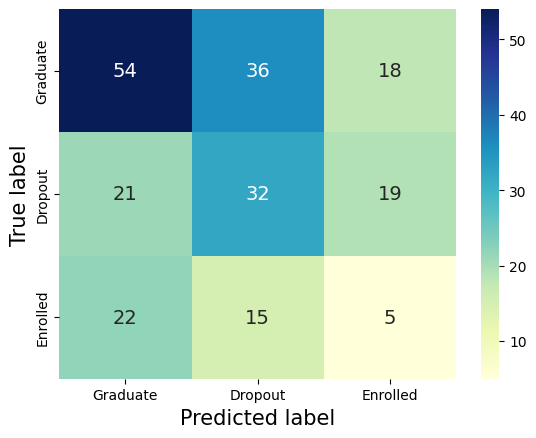

,Graduate,Dropout,Enrolled
Graduate,54,36,18
Dropout,21,32,19
Enrolled,22,15,5


In [55]:
y_pred_test_log_reg = logreg_model.predict(test_pca_df)
y_pred_test_log_reg = encoder.inverse_transform(y_pred_test_log_reg)
evaluating(y_pred=y_pred_test_log_reg, y_true=y_test)

### Decision Tree

              precision    recall  f1-score   support

     Dropout       0.68      0.75      0.71        72
    Enrolled       0.45      0.67      0.54        42
    Graduate       0.81      0.60      0.69       108

    accuracy                           0.66       222
   macro avg       0.65      0.67      0.65       222
weighted avg       0.70      0.66      0.67       222



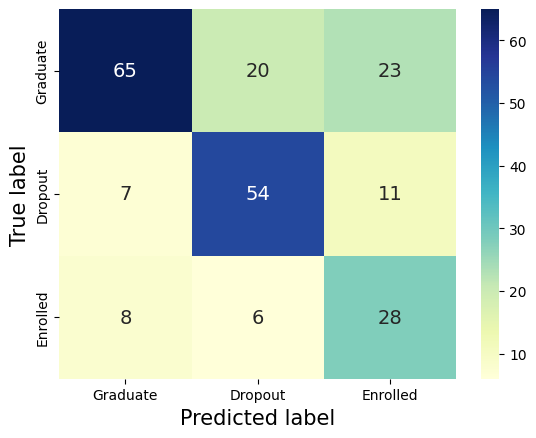

,Graduate,Dropout,Enrolled
Graduate,65,20,23
Dropout,7,54,11
Enrolled,8,6,28


In [48]:
y_pred_test_tree = tree_model.predict(test_pca_df)
y_pred_test_tree = encoder.inverse_transform(y_pred_test_tree)
evaluating(y_pred=y_pred_test_tree, y_true=y_test)

### Random Forest

              precision    recall  f1-score   support

     Dropout       0.92      0.67      0.77        72
    Enrolled       0.47      0.69      0.56        42
    Graduate       0.81      0.81      0.81       108

    accuracy                           0.74       222
   macro avg       0.73      0.72      0.71       222
weighted avg       0.78      0.74      0.75       222



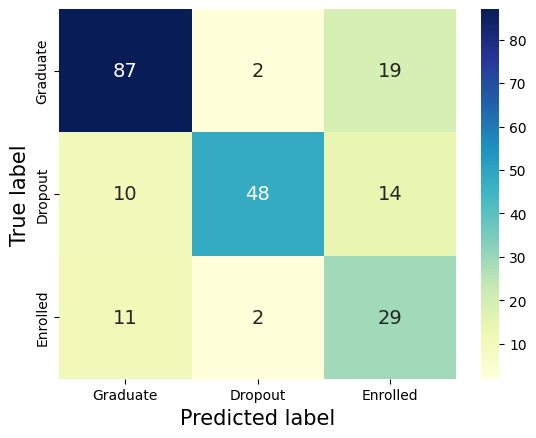

,Graduate,Dropout,Enrolled
Graduate,87,2,19
Dropout,10,48,14
Enrolled,11,2,29


In [49]:
y_pred_test_rdf = rdf_model.predict(test_pca_df)
y_pred_test_rdf = encoder.inverse_transform(y_pred_test_rdf)
evaluating(y_pred=y_pred_test_rdf, y_true=y_test)

### Gradient Boosting

              precision    recall  f1-score   support

     Dropout       0.91      0.67      0.77        72
    Enrolled       0.44      0.71      0.55        42
    Graduate       0.80      0.75      0.78       108

    accuracy                           0.72       222
   macro avg       0.72      0.71      0.70       222
weighted avg       0.77      0.72      0.73       222



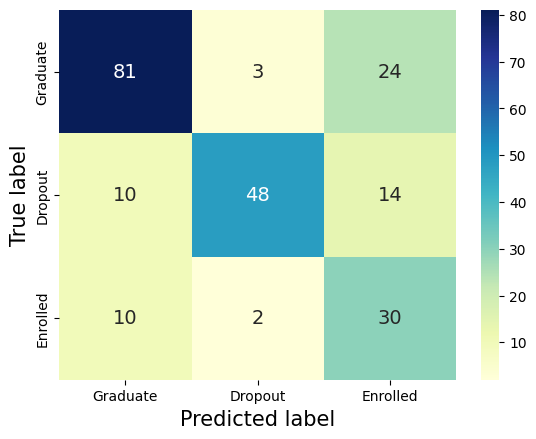

,Graduate,Dropout,Enrolled
Graduate,81,3,24
Dropout,10,48,14
Enrolled,10,2,30


In [50]:
y_pred_test_gboost = gboost_model.predict(test_pca_df)
y_pred_test_gboost = encoder.inverse_transform(y_pred_test_gboost)
evaluating(y_pred=y_pred_test_gboost, y_true=y_test)

### Save Model

In [51]:
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

In [56]:
rdf_model

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       n_jobs=-1, random_state=123)

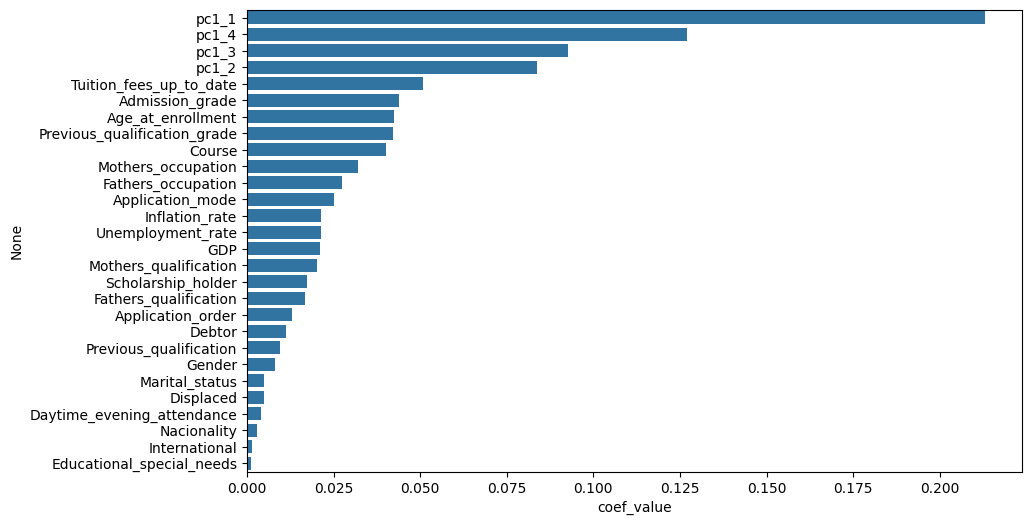

,coef_value
pc1_1,0.213119
pc1_4,0.126911
pc1_3,0.092564
pc1_2,0.083629
Tuition_fees_up_to_date,0.050954
Admission_grade,0.044016
Age_at_enrollment,0.042510
Previous_qualification_grade,0.042224
Course,0.040112
Mothers_occupation,0.032094


In [52]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

plot_feature_importances(gboost_model.feature_importances_, train_pca_df.columns)